want: number electron/volume (unit: cm-3)
n_e = density*ionized fraction/proton mass (use electron abundance)

n_e = electronabundance * n_H
get ne for each position
sum over length for path.

want distribution of DM for entire galaxy
sightline going thru galaxy vs cgm alone
- 0.15*R200

proton mass = 8.4e-58 M_sun

In [1]:
import numpy as np
import pandas as pd 

d = {'col1': [1, 2, 3, 4, 5, 6], 'col2': [3, 4, 5, 6, 7, 8]}
df = pd.DataFrame(data=d)

df

,col1,col2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8


In [4]:
np.linalg.norm([[1,2],[3,4]], axis = 0)

array([3.16227766, 4.47213595])

In [14]:
mask = (df['col1'] > 3)
mask

0    False
1    False
2    False
3     True
4     True
5     True
Name: col1, dtype: bool

In [18]:
df_new = df[mask]
df_new

,col1,col2
3,4,6
4,5,7
5,6,8


In [23]:
df_new.loc[:,'new'] = 2

df_new

,col1,col2,new
3,4,6,2
4,5,7,2
5,6,8,2


In [1]:
# attempt at reading in hdf5 files
# coding: utf-8
import halo_analysis as halo
import gizmo_analysis as gizmo
from gizmo_analysis import io
import h5py
import numpy as np
import os
from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [64]:
fh = h5py.File('/ceph/submit/data/user/z/zimi/analysis/FIRE/m12z_res4200/output/snapshot_600.1.hdf5', 'r')
gas = fh["PartType0"]

In [ ]:
host = halo.io.IO.read_catalogs('redshift', 0,'/ceph/submit/data/user/z/zimi/analysis/FIRE/m12f_res7100', species='gas')
header = gizmo.io.Read.read_header('/ceph/submit/data/user/z/zimi/analysis/FIRE/m12f_res7100')

In [13]:
host['scale.radius'][53425]

np.float32(21.152422)

In [12]:
host['mass.vir'][53425]

np.float32(1273874600000.0)

In [11]:
host['mass.200c'][53425]

np.float32(1076096800000.0)

In [ ]:
prop = ['position', 'mass']
part = gizmo.io.Read.read_snapshots(['gas'], 'redshift', 0, '/ceph/submit/data/user/z/zimi/analysis/FIRE/m12z_res4200', properties = 'all', assign_hosts_rotation=True)

In [11]:
def plot2d(x, y, value, cmap = 'viridis', bins = 150, norm = None, vmin = None, vmax = None):
    mean, xbins, ybins, binnumber = stats.binned_statistic_2d(x, y, value, bins = bins)

    # with np.errstate(divide='ignore', invalid='ignore'):  # suppress possible divide-by-zero warnings
    plot = plt.pcolormesh(ybins, xbins, mean, cmap = cmap, norm = norm, vmin = vmin, vmax = vmax)

    return plot

In [ ]:
binsize_plot = plot2d(halo_gas['position'][:,2], halo_gas['dist_y'], value = halo_gas['smoothing_len'], cmap = 'viridis_r', bins = [700,700])
plt.axis('equal')

KeyError: 'dist_z'

In [23]:
f_e = gas['ElectronAbundance']
y = gas['Metallicity'][:, 1]
mu = 1/((1-y) + y/4 + (1-y)*f_e)

In [2]:
num_points = 20
radius = 10
coordinates = []
for i in range(num_points):
    angle = 2 * np.pi * i / num_points  # Calculate angle in radians
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    coordinates.append([x, y, 0])

coordinates = np.array(coordinates)

In [ ]:
from scipy.linalg import expm
def Rodrigues(k, theta):
    """
    Uses the Rodrigues' rotation formula to return the rotation matrix for
    rotating a vector by an angle theta about an axis specified by unit 
    vector k.
    """
    K = np.cross(np.eye(3), k)
    return expm(K*theta)

In [24]:
rot = Rodrigues((1,0,0), (np.pi)/3)
c2 = np.dot(coordinates, rot.T)

(-10.0, 10.0)

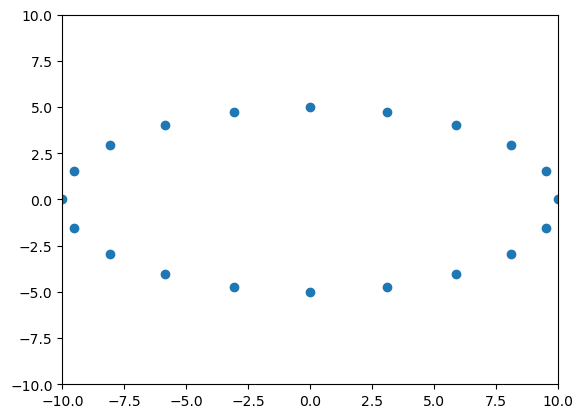

In [26]:
from matplotlib import pyplot as plt
plt.scatter(c2[:,0], c2[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [34]:
from pathlib import Path
import h5py

In [35]:
cooling_dir = '/ceph/submit/data/user/z/zimi/analysis/FIRE/m12z_res4200/cooling_output'
dir = Path(cooling_dir)
for file in sorted(dir.glob(f"cooling_600_ambient.0.hdf5")):
    with h5py.File(file, 'r') as fh:
        cooling_time_seconds = fh[f'Ambient/time'][()] #* fh[f'{phase}/time'].attrs['to_cgs']     # Cooling times in seconds
        cooling_rate_cgs = fh[f'Ambient/rate'][()] #* fh[f'{phase}/rate'].attrs['to_cgs']    # Cooling rate in erg sec^-1 cm^3

print(cooling_rate_cgs)

[ 2.0945355e-23  2.1593557e-23  2.1488839e-23 ... -1.0038116e-23
 -1.0055212e-23 -9.8985533e-24]


In [10]:
cooling_dir = '/ceph/submit/data/user/z/zimi/analysis/FIRE/m12f_res7100/output'
dir = Path(cooling_dir)
for file in sorted(dir.glob(f"cooling_600_ambient.0.hdf5")):
    with h5py.File(file, 'r') as fh:
        cooling_time_seconds = fh[f'Ambient/time'][()] #* fh[f'{phase}/time'].attrs['to_cgs']     # Cooling times in seconds
        cooling_rate_cgs = fh[f'Ambient/rate'][()] #* fh[f'{phase}/rate'].attrs['to_cgs']    # Cooling rate in erg sec^-1 cm^3

print(cooling_rate_cgs)

[-2.6586455e-23 -4.3695652e-24 -2.0304944e-23 ...  3.6138866e-24
  3.5625199e-24  3.5060300e-24]
